# Simple Linear Regression Project
Modelling the linear relationship on a Stock data.

# Project overview
In this project, I build a Simple Linear Regression model to study the linear relationship on Ford stock data.The goal of this notebook is to study the topic of simple linear regression on real-world data and to solve the problem using data science methodology

# Simple Linear Regression
Simple linear regression is a statistical method that allows us to summarize and study relationships between two continuous (quantitative) variables:

+ One variable, denoted x, is regarded as the predictor, explanatory, or independent variable.
+ The other variable, denoted y, is regarded as the response, outcome, or dependent variable.


# Problem Understanding
In Stock Market is the financial epitome of financial business and trading since it came into existence it has shown the impact of hits low and similarly when it is high. The stock market crash in 2008 showed the world that the business hit the low when the Dow Jones Industrial Average fell 777.68%. Several machine learning algorithms have shown that these stock prices can be predicted and these algorithms can be implemented using the approach of supervised learning. In Supervised Learning, we have test data using this we train the models. Although the results obtained after training the model may differ from the actual but it has been observed that in many cases accuracy is satisfactory.

First of all, we import the libraries required in this project:

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model
import datetime
import sklearn
from sklearn import linear_model
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline

In [2]:
data = pd.read_csv('D:/ford.csv')
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1972-06-01,0.000000,2.173495,2.149165,2.153220,0.277406,1091238
1,1972-06-02,2.153220,2.173495,2.141055,2.149165,0.276884,1174468
2,1972-06-05,2.149165,2.169440,2.141055,2.149165,0.276884,5209582
3,1972-06-06,2.149165,2.157275,2.116725,2.124835,0.273750,1424158
4,1972-06-07,2.124835,2.137000,2.112670,2.112670,0.272182,675088


In [3]:
data['Date'] = pd.DatetimeIndex(data['Date'])

In [4]:
data.shape

(12438, 7)

.head() returns the last 5 rows

In [6]:
data.drop('Adj Close', axis = 1, inplace = True)
data.head()

,Date,Open,High,Low,Close,Volume
0,1972-06-01,0.000000,2.173495,2.149165,2.153220,1091238
1,1972-06-02,2.153220,2.173495,2.141055,2.149165,1174468
2,1972-06-05,2.149165,2.169440,2.141055,2.149165,5209582
3,1972-06-06,2.149165,2.157275,2.116725,2.124835,1424158
4,1972-06-07,2.124835,2.137000,2.112670,2.112670,675088


In [8]:
# checking a null value present in dataframe
data.isnull().sum()

Date      0
Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64

In [9]:
#Displaying informantion of the dataframe used
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12438 entries, 0 to 12437
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    12438 non-null  datetime64[ns]
 1   Open    12438 non-null  float64       
 2   High    12438 non-null  float64       
 3   Low     12438 non-null  float64       
 4   Close   12438 non-null  float64       
 5   Volume  12438 non-null  int64         
dtypes: datetime64[ns](1), float64(4), int64(1)
memory usage: 583.2 KB


In [10]:
x = data[['Open','High','Low','Volume']]
y = data['Close']

In [12]:
from sklearn.model_selection import train_test_split
x_train , x_test, y_train, y_test = train_test_split(x, y, random_state = 0)

In [14]:
x_test.shape

(3110, 4)

In [15]:
x_train.shape

(9328, 4)

In [16]:
from sklearn.metrics import confusion_matrix, accuracy_score
linReg = LinearRegression()

In [17]:
linReg.fit(x_train, y_train)

LinearRegression()

In [20]:
print(linReg.coef_)

[-4.66983552e-01  7.44940218e-01  7.20863348e-01  1.19375620e-10]


In [21]:
print(linReg.intercept_)

0.00524995489270097


In [22]:
predicted = linReg.predict(x_test)

In [23]:
print(x_test)

            Open       High        Low    Volume
8076   15.030000  15.030000  14.780000   9733300
11068  13.350000  13.500000  13.280000  28808300
10386  17.150000  17.500000  17.120001  32233600
2476    0.866762   0.876900   0.851556   5035724
11425  11.630000  11.730000  11.600000  25132400
...          ...        ...        ...       ...
10407  16.420000  16.540001  16.209999  33457700
11892   9.600000   9.680000   9.520000  36487800
4787    5.884859   5.907669   5.793621   4041074
9962   10.020000  10.150000   9.900000  43750700
7057   28.988474  29.606710  28.919781   4818536

[3110 rows x 4 columns]


In [25]:
#creating a dataframe
dataFrame = pd.DataFrame(y_test, predicted)

In [26]:
dataFrame = pd.DataFrame({'Actual':y_test,'predicted': predicted})

In [28]:
dataFrame.head(10)

,Actual,predicted
8076,14.850000,14.838461
11068,13.440000,13.404217
10386,17.500000,17.377965
2476,0.856625,0.868181
11425,11.630000,11.677395
8746,8.370000,8.429219
3329,2.653509,2.678250
10663,16.629999,16.656795
8475,7.840000,7.815534
10093,10.120000,10.166371


In [33]:
from sklearn.metrics import confusion_matrix

In [34]:
linReg.score(x_test,y_test)

0.9998139454241808

In [35]:
import math
import sklearn.metrics as metrics

In [36]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, predicted))

Mean Absolute Error: 0.05686521169269626


In [39]:
print('Mean Square Error:',math.sqrt(metrics.mean_absolute_error(y_test, predicted)))

Mean Square Error: 0.23846427760294886


In [53]:
graph = dataFrame.head(20)

In [67]:
graph.plot(kind='bar')


<AxesSubplot:>

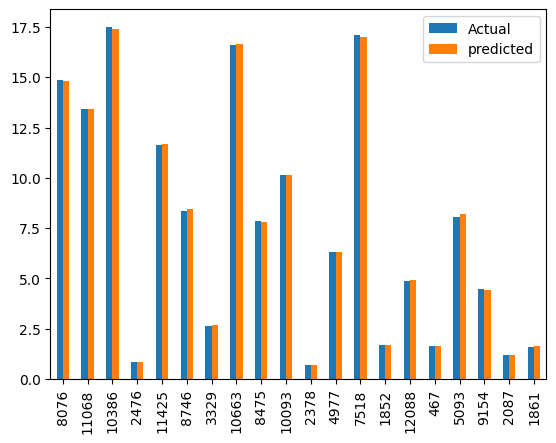

In [68]:
plt.show()